## Importing Libraries and Data

In [37]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the kmeans algorithm
from sklearn.cluster import KMeans

In [87]:
fiscal= pd.read_csv("fiscal-provinces.csv", sep=";")

## General Analysis of the Data

In [89]:
fiscal.head()

,Provinces,Ingresos de Origen Nacional,Ingresos de Origen Provincial,Ingresos de Regal�as,Ingresos No Tributarios,Ingresos por Vta.Bienes y Serv.de la Adm.Publ.,Ingresos por Rentas de la Propiedad,Ingresos por Transferencias Corrientes,Gastos de Personal,Gastos en Bienes de Consumo,Gastos en Servicios,Gastos en Rentas de la Propiedad
0,CIUDAD DE BUENOS AIRES,314847.321300,98140.45222,0.000000,7595.440576,3630.378463,3433.297912,7978.240778,226338.98910,19502.904160,86733.035600,34783.994100
1,BUENOS AIRES,466666.206400,501526.70940,0.000000,7487.258879,1933.145264,2016.702558,164391.747900,584421.54090,24039.420010,47753.447040,41711.442430
2,\nCATAMARCA,5832.377521,55441.78919,329.042393,2725.081700,33.435697,1423.413935,3101.608008,36048.28792,1479.931491,2215.361871,602.052655
3,\nCORDOBA,113144.818600,182814.74710,0.000000,12656.476690,564.966120,7159.324187,22241.942700,144393.67860,10204.661010,24983.825230,11953.643530
4,\nCORRIENTES,11716.530000,78694.40261,42.020000,588.780000,525.520000,337.550000,6478.811596,52897.39000,9886.030000,6357.970000,822.320221


In [25]:
fiscal.describe()

,Ingresos de Origen Nacional,Ingresos de Origen Provincial,Ingresos de Regal�as,Ingresos No Tributarios,Ingresos por Vta.Bienes y Serv.de la Adm.Publ.,Ingresos por Rentas de la Propiedad,Ingresos por Transferencias Corrientes,Gastos de Personal,Gastos en Bienes de Consumo,Gastos en Servicios,Gastos en Rentas de la Propiedad
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,56982.191974,93360.397370,3948.754375,4458.815049,925.542229,1756.352788,14108.502308,89782.852867,5682.896211,12015.187108,5851.362171
std,108834.690324,96211.795584,8432.991502,4784.723749,1477.726339,2007.628993,32574.502585,115645.790999,5706.175651,18782.168300,10395.563720
min,3550.753189,25412.072900,0.000000,54.650346,0.000000,0.000000,1429.100656,23499.191960,968.549079,2112.550354,58.220709
25%,10728.121856,45187.875435,0.000000,1078.273104,45.580822,330.587143,3373.472661,35947.879802,2100.004648,3524.284469,792.836705
50%,16442.762620,72684.636145,213.574429,2580.675625,376.331997,956.249145,6130.298995,53875.048300,3936.638475,5875.512996,2774.524408
75%,37031.366557,98144.353178,2333.560764,6591.845825,932.576577,2370.851397,9476.883792,88194.734227,6798.729359,10027.175654,4834.836663
max,466666.206400,501526.709400,35681.725070,16966.804490,6267.306320,7159.324187,164391.747900,584421.540900,24039.420010,86733.035600,41711.442430


In [26]:
fiscal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Provinces                                       24 non-null     object 
 1   Ingresos de Origen Nacional                     24 non-null     float64
 2   Ingresos de Origen Provincial                   24 non-null     float64
 3   Ingresos de Regal�as                            24 non-null     float64
 4   Ingresos No Tributarios                         24 non-null     float64
 5   Ingresos por Vta.Bienes y Serv.de la Adm.Publ.  24 non-null     float64
 6   Ingresos por Rentas de la Propiedad             24 non-null     float64
 7   Ingresos por Transferencias Corrientes          24 non-null     float64
 8   Gastos de Personal                              24 non-null     float64
 9   Gastos en Bienes de Consumo                  

## Cleaning of the Data 

In [27]:
fiscal.rename(columns={'Ingresos de Regal�as': 'Ingresos de Regalias'}, inplace=True)
fiscal = fiscal.replace('\n','', regex=True)

In [28]:
fiscal

,Provinces,Ingresos de Origen Nacional,Ingresos de Origen Provincial,Ingresos de Regalias,Ingresos No Tributarios,Ingresos por Vta.Bienes y Serv.de la Adm.Publ.,Ingresos por Rentas de la Propiedad,Ingresos por Transferencias Corrientes,Gastos de Personal,Gastos en Bienes de Consumo,Gastos en Servicios,Gastos en Rentas de la Propiedad
0,CIUDAD DE BUENOS AIRES,314847.321300,98140.45222,0.000000,7595.440576,3630.378463,3433.297912,7978.240778,226338.98910,19502.904160,86733.035600,34783.994100
1,BUENOS AIRES,466666.206400,501526.70940,0.000000,7487.258879,1933.145264,2016.702558,164391.747900,584421.54090,24039.420010,47753.447040,41711.442430
2,CATAMARCA,5832.377521,55441.78919,329.042393,2725.081700,33.435697,1423.413935,3101.608008,36048.28792,1479.931491,2215.361871,602.052655
3,CORDOBA,113144.818600,182814.74710,0.000000,12656.476690,564.966120,7159.324187,22241.942700,144393.67860,10204.661010,24983.825230,11953.643530
4,CORRIENTES,11716.530000,78694.40261,42.020000,588.780000,525.520000,337.550000,6478.811596,52897.39000,9886.030000,6357.970000,822.320221
5,CHACO,15054.447220,103865.21810,0.000000,1036.900416,28.139766,892.760530,8571.403431,67400.76052,3994.576540,6440.256128,2717.113027
6,CHUBUT,17831.078020,33561.55433,19303.037340,6293.374807,448.023109,736.435423,3041.193856,67850.62364,1954.240973,2873.630350,5572.408360
7,ENTRE RIOS,35737.380000,100679.17620,793.620000,1543.730000,904.620000,876.890000,13918.268960,82198.31000,4364.930000,6245.590000,3571.520885
8,FORMOSA,4888.945679,75053.96205,87.178376,638.402800,335.463080,534.040138,5781.786394,36450.10114,6142.781166,5845.274992,623.988086
9,JUJUY,7493.231569,58583.98326,98.106465,903.471321,213.054107,171.421791,8877.148003,43061.12755,2267.071126,2501.004686,3105.271339


In [30]:
X= fiscal.iloc[:, 1:]
X.head()

,Ingresos de Origen Nacional,Ingresos de Origen Provincial,Ingresos de Regalias,Ingresos No Tributarios,Ingresos por Vta.Bienes y Serv.de la Adm.Publ.,Ingresos por Rentas de la Propiedad,Ingresos por Transferencias Corrientes,Gastos de Personal,Gastos en Bienes de Consumo,Gastos en Servicios,Gastos en Rentas de la Propiedad
0,314847.321300,98140.45222,0.000000,7595.440576,3630.378463,3433.297912,7978.240778,226338.98910,19502.904160,86733.035600,34783.994100
1,466666.206400,501526.70940,0.000000,7487.258879,1933.145264,2016.702558,164391.747900,584421.54090,24039.420010,47753.447040,41711.442430
2,5832.377521,55441.78919,329.042393,2725.081700,33.435697,1423.413935,3101.608008,36048.28792,1479.931491,2215.361871,602.052655
3,113144.818600,182814.74710,0.000000,12656.476690,564.966120,7159.324187,22241.942700,144393.67860,10204.661010,24983.825230,11953.643530
4,11716.530000,78694.40261,42.020000,588.780000,525.520000,337.550000,6478.811596,52897.39000,9886.030000,6357.970000,822.320221


## K-Means Clustering Analysis and PCA 


In [31]:

# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.42028759,  0.05075119, -0.47832178,  0.66964944,  1.86977205,
         0.85325157, -0.19223963,  1.20621047,  2.47402942,  4.06368778,
         2.84303103],
       [ 3.84523933,  4.33361714, -0.47832178,  0.64655334,  0.69652572,
         0.13246936,  4.7127508 ,  4.36918017,  3.28614716,  1.94370064,
         3.52374859],
       [-0.48008531, -0.40259258, -0.43846412, -0.37014095, -0.61668645,
        -0.16940363, -0.34516655, -0.47464139, -0.75240611, -0.53298416,
        -0.51581722],
       [ 0.5271349 ,  0.94976212, -0.47832178,  1.75014819, -0.24925543,
         2.74910237,  0.25505756,  0.48238147,  0.80947704,  0.70532674,
         0.5996335 ],
       [-0.42485744, -0.15571301, -0.4732318 , -0.82622767, -0.27652335,
        -0.72190538, -0.23926041, -0.32581203,  0.75243637, -0.30767968,
        -0.49417289],
       [-0.3935282 ,  0.11153265, -0.47832178, -0.73055683, -0.62034737,
        -0.43940701, -0.17363857, -0.19770268, -0.30223952, -0.30320438,
        -0.307

C:\Users\Usuario\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


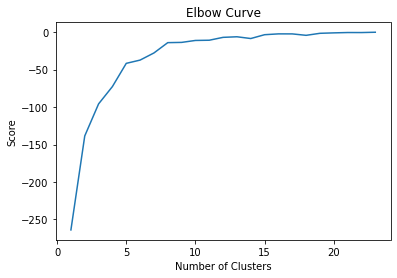

In [38]:
# Run a number of tests, for 1, 2, ... num_clusters
OMP_NUM_THREADS=1
num_clusters = 24
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [39]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [41]:
X_scaled

array([[ 2.42028759,  0.05075119, -0.47832178,  0.66964944,  1.86977205,
         0.85325157, -0.19223963,  1.20621047,  2.47402942,  4.06368778,
         2.84303103],
       [ 3.84523933,  4.33361714, -0.47832178,  0.64655334,  0.69652572,
         0.13246936,  4.7127508 ,  4.36918017,  3.28614716,  1.94370064,
         3.52374859],
       [-0.48008531, -0.40259258, -0.43846412, -0.37014095, -0.61668645,
        -0.16940363, -0.34516655, -0.47464139, -0.75240611, -0.53298416,
        -0.51581722],
       [ 0.5271349 ,  0.94976212, -0.47832178,  1.75014819, -0.24925543,
         2.74910237,  0.25505756,  0.48238147,  0.80947704,  0.70532674,
         0.5996335 ],
       [-0.42485744, -0.15571301, -0.4732318 , -0.82622767, -0.27652335,
        -0.72190538, -0.23926041, -0.32581203,  0.75243637, -0.30767968,
        -0.49417289],
       [-0.3935282 ,  0.11153265, -0.47832178, -0.73055683, -0.62034737,
        -0.43940701, -0.17363857, -0.19770268, -0.30223952, -0.30320438,
        -0.307

In [42]:
fiscal_predicted= pd.DataFrame(X_scaled, columns= X.columns, index=fiscal["Provinces"])

In [43]:
fiscal_predicted

,Ingresos de Origen Nacional,Ingresos de Origen Provincial,Ingresos de Regalias,Ingresos No Tributarios,Ingresos por Vta.Bienes y Serv.de la Adm.Publ.,Ingresos por Rentas de la Propiedad,Ingresos por Transferencias Corrientes,Gastos de Personal,Gastos en Bienes de Consumo,Gastos en Servicios,Gastos en Rentas de la Propiedad
Provinces,,,,,,,,,,,
CIUDAD DE BUENOS AIRES,2.420288,0.050751,-0.478322,0.669649,1.869772,0.853252,-0.192240,1.206210,2.474029,4.063688,2.843031
BUENOS AIRES,3.845239,4.333617,-0.478322,0.646553,0.696526,0.132469,4.712751,4.369180,3.286147,1.943701,3.523749
CATAMARCA,-0.480085,-0.402593,-0.438464,-0.370141,-0.616686,-0.169404,-0.345167,-0.474641,-0.752406,-0.532984,-0.515817
CORDOBA,0.527135,0.949762,-0.478322,1.750148,-0.249255,2.749102,0.255058,0.482381,0.809477,0.705327,0.599633
CORRIENTES,-0.424857,-0.155713,-0.473232,-0.826228,-0.276523,-0.721905,-0.239260,-0.325812,0.752436,-0.307680,-0.494173
CHACO,-0.393528,0.111533,-0.478322,-0.730557,-0.620347,-0.439407,-0.173639,-0.197703,-0.302240,-0.303204,-0.307983
CHUBUT,-0.367467,-0.634901,1.859900,0.391667,-0.330095,-0.518947,-0.347061,-0.193729,-0.667496,-0.497183,-0.027411
ENTRE RIOS,-0.199401,0.077706,-0.382189,-0.622352,-0.014463,-0.447482,-0.005966,-0.066995,-0.235940,-0.313792,-0.224026
FORMOSA,-0.488940,-0.194365,-0.467762,-0.815634,-0.407904,-0.621929,-0.261119,-0.471092,0.082328,-0.335564,-0.513662


In [44]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [90]:
X_reduced

array([[ 5.30650683,  1.10105138],
       [ 9.66099318, -2.18524992],
       [-1.4682112 , -0.56570222],
       [ 2.21415882,  0.6557822 ],
       [-0.71304636, -0.83033324],
       [-0.87281039, -0.99675332],
       [-1.09041834,  1.23630362],
       [-0.51694604, -0.62835535],
       [-1.09069217, -0.83777595],
       [-1.34956199, -0.88381579],
       [-0.9732155 ,  0.41729783],
       [-1.43893235, -0.72263859],
       [ 0.38960675,  1.6742887 ],
       [-1.08735688, -0.78557231],
       [ 0.92441024,  5.84717734],
       [-1.13919033, -0.25296449],
       [-1.00465844, -0.71772536],
       [-0.78732373,  0.03504636],
       [-1.6764671 , -0.90348841],
       [-1.51995226,  0.74363275],
       [ 1.57791219,  0.11990298],
       [-1.05262654, -0.53631954],
       [-0.68139081, -0.87022733],
       [-1.61078758, -0.11356136]])

To represent the result in a two-dimensional way, we need to construct a Principal Component Analysis

In [47]:
pca_fiscal_clustered= pd.DataFrame(X_reduced, columns= ["PC1", "PC2"], index=fiscal["Provinces"])
pca_fiscal_clustered

,PC1,PC2
Provinces,,
CIUDAD DE BUENOS AIRES,5.306507,1.101051
BUENOS AIRES,9.660993,-2.185250
CATAMARCA,-1.468211,-0.565702
CORDOBA,2.214159,0.655782
CORRIENTES,-0.713046,-0.830333
CHACO,-0.872810,-0.996753
CHUBUT,-1.090418,1.236304
ENTRE RIOS,-0.516946,-0.628355
FORMOSA,-1.090692,-0.837776


In [48]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

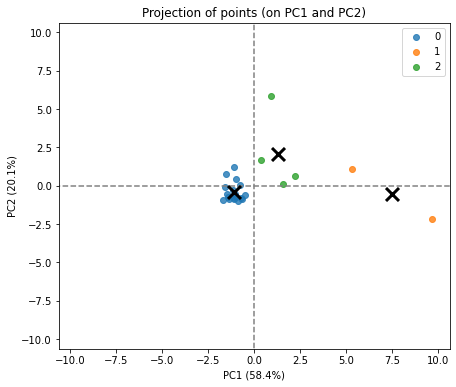

In [53]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

In [58]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=fiscal["Provinces"], columns=X.columns)
X_clustered["cluster"] = clusters

X_clustered

,Ingresos de Origen Nacional,Ingresos de Origen Provincial,Ingresos de Regalias,Ingresos No Tributarios,Ingresos por Vta.Bienes y Serv.de la Adm.Publ.,Ingresos por Rentas de la Propiedad,Ingresos por Transferencias Corrientes,Gastos de Personal,Gastos en Bienes de Consumo,Gastos en Servicios,Gastos en Rentas de la Propiedad,cluster
Provinces,,,,,,,,,,,,
CIUDAD DE BUENOS AIRES,2.420288,0.050751,-0.478322,0.669649,1.869772,0.853252,-0.192240,1.206210,2.474029,4.063688,2.843031,1
BUENOS AIRES,3.845239,4.333617,-0.478322,0.646553,0.696526,0.132469,4.712751,4.369180,3.286147,1.943701,3.523749,1
CATAMARCA,-0.480085,-0.402593,-0.438464,-0.370141,-0.616686,-0.169404,-0.345167,-0.474641,-0.752406,-0.532984,-0.515817,0
CORDOBA,0.527135,0.949762,-0.478322,1.750148,-0.249255,2.749102,0.255058,0.482381,0.809477,0.705327,0.599633,2
CORRIENTES,-0.424857,-0.155713,-0.473232,-0.826228,-0.276523,-0.721905,-0.239260,-0.325812,0.752436,-0.307680,-0.494173,0
CHACO,-0.393528,0.111533,-0.478322,-0.730557,-0.620347,-0.439407,-0.173639,-0.197703,-0.302240,-0.303204,-0.307983,0
CHUBUT,-0.367467,-0.634901,1.859900,0.391667,-0.330095,-0.518947,-0.347061,-0.193729,-0.667496,-0.497183,-0.027411,0
ENTRE RIOS,-0.199401,0.077706,-0.382189,-0.622352,-0.014463,-0.447482,-0.005966,-0.066995,-0.235940,-0.313792,-0.224026,0
FORMOSA,-0.488940,-0.194365,-0.467762,-0.815634,-0.407904,-0.621929,-0.261119,-0.471092,0.082328,-0.335564,-0.513662,0


<AxesSubplot:>

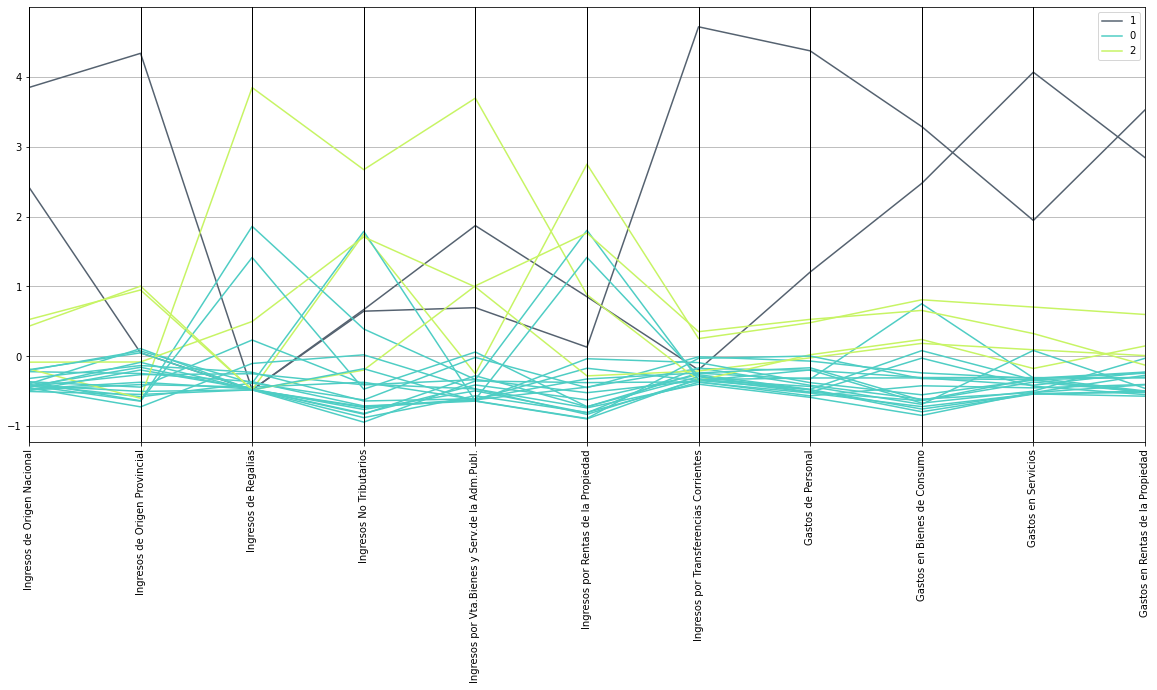

In [86]:
first_cluster=  X_clustered[X_clustered["cluster"]==0]
first_cluster.reset_index(level=0, inplace=True)
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
pd.plotting.parallel_coordinates(
    X_clustered,"cluster", color=('#556270', '#4ECDC4', '#C7F464')
)

Cluster 1: se caracteriza por tener altos niveles de Ingresos de Origen Provincial, Ingresos de Origen Nacional e Ingresos por Transferencias Corrientes. En cuestion de gasto, tienen altos niveles de Gastos de Personal, Gasto en Bienes de Consumo, Gastos en Servicios y en Propiedad. 

Cluster 0: se caracteriza por tener niveles moderados de Ingresos de Regalias, Ingresos no Tributarios e Ingresos por Renta de la Propiedad. Por el lado de los gastos, tienen niveles moderados en gastos en Servicios

Cluster 2: se caracteriza por tener niveles altos de Ingresos por Regalias, no tributarios, Ingresos por Venta de Bienes y Sevicios y por Rentas de la Propiedad. Por el lado del gasto, se tienen niveles moderados y bajos en la mayoria de los grupos.

Se puede determinar que la mayor diferencia entre los grupos radica en los ingresos, el cluster 1 depende mucho mas de los ingresos tributarios mientras que el cluster 0 y 2 dependen de los no tributarios como las regalias y rentas de la propiedad. Por el lado del gasto, la mayor diferencia corresponde al gasto de personal y bienes de consumo. Aquellas provincias del cluster 1 que dependen en mayor parte de los ingresos tributarios gastan mas en personal y bienes de consumo que aquellos que dependen mas de ingresos no tributarios. 